<center><h1>Predicting optimal nutrients for crops using ML</h1></center>

Downloaded from Kaggle: https://www.kaggle.com/atharvaingle/crop-recommendation-dataset/version/1

This Dataset has N,P,K from soil and other features from weather associated with different crops. Goal is to build a classifier for prediction of appropriate crop based on weather, and identify features important for each crop.

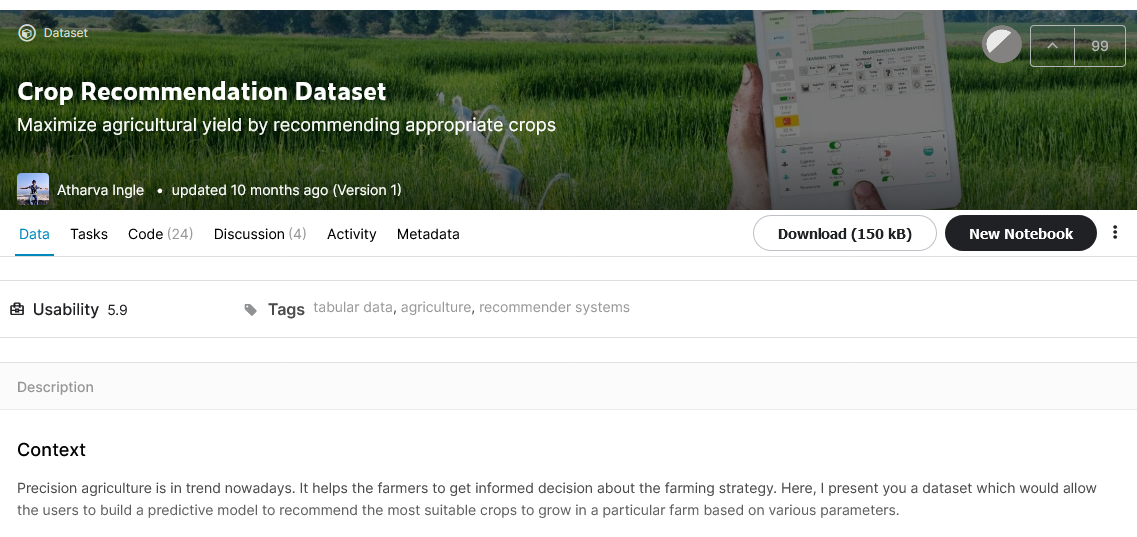

In [1]:
import sys, os
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
import pycaret
pycaret.utils.version()

'2.3.10'

In [2]:
#pip install shap
import shap

In [ ]:
#If you need to upgrade...
#!{sys.executable} -m pip install pycaret --upgrade --user

#Make sure you restart the kernel and run import commands again before proceeding

In [8]:
file1 = pd.read_csv("Crop_recommendation.csv", header= 0, sep=",")
file1.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
#How many crops
len(set(file1['label']))

22

We are going to perform classification of the data. PyCaret also has clustering and regression modules. You can check them out if you want to

## Classification

In [10]:
from pycaret.classification import *

In [35]:
data_setup = setup(data= file1, target='label')

,Description,Value
0,session_id,195
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,"apple: 0, banana: 1, blackgram: 2, chickpea: 3, coconut: 4, coffee: 5, cotton: 6, grapes: 7, jute: 8, kidneybeans: 9, lentil: 10, maize: 11, mango: 12, mothbeans: 13, mungbean: 14, muskmelon: 15, orange: 16, papaya: 17, pigeonpeas: 18, pomegranate: 19, rice: 20, watermelon: 21"
4,Original Data,"(2200, 8)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


We can obtain models using different methods:
1. We can simply ask PyCaret to compare all models (compare_models())
2. We can ask it to compare all models and select top 5 using the default metric (AUC score)
3. We can tune the parameters in each of the top 5 models and get better models
4. We can blend the top 5 tuned models and select the best model
5. Or we can simply do automl and select the best model that way

All of these approaches are demonstrated below

In [36]:
top5 = compare_models(n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9948,1.0000,0.9946,0.9956,0.9948,0.9946,0.9946,0.0420
nb,Naive Bayes,0.9941,0.9999,0.9939,0.9951,0.9941,0.9939,0.9939,0.0040
qda,Quadratic Discriminant Analysis,0.9909,0.9999,0.9907,0.9922,0.9908,0.9905,0.9905,0.0040
et,Extra Trees Classifier,0.9889,0.9999,0.9887,0.9901,0.9889,0.9884,0.9885,0.0330
lightgbm,Light Gradient Boosting Machine,0.9876,0.9999,0.9878,0.9896,0.9876,0.9871,0.9872,0.5250
dt,Decision Tree Classifier,0.9850,0.9922,0.9848,0.9866,0.9850,0.9843,0.9844,0.0040
gbc,Gradient Boosting Classifier,0.9850,0.9999,0.9848,0.9873,0.9850,0.9843,0.9844,0.6690
knn,K Neighbors Classifier,0.9760,0.9981,0.9753,0.9797,0.9757,0.9748,0.9750,0.2100
lr,Logistic Regression,0.9707,0.9995,0.9699,0.9739,0.9705,0.9693,0.9695,0.4550
lda,Linear Discriminant Analysis,0.9695,0.9995,0.9688,0.9739,0.9692,0.9680,0.9682,0.0040


In [37]:
top5

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=195, verbose=0,
                        warm_start=False),
 GaussianNB(priors=None, var_smoothing=1e-09),
 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                               store_covariance=False, tol=0.0001),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_

In [38]:
tuned_models = [tune_model(i) for i in top5]
tuned_models

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9935,1.0000,0.9935,0.9943,0.9935,0.9932,0.9932
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9935,1.0000,0.9924,0.9943,0.9934,0.9932,0.9932
3,0.9935,1.0000,0.9935,0.9943,0.9935,0.9932,0.9932
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9675,0.9997,0.9675,0.9748,0.9672,0.9660,0.9664
6,0.9935,0.9999,0.9935,0.9943,0.9935,0.9932,0.9932
7,0.9935,1.0000,0.9935,0.9944,0.9935,0.9932,0.9932
8,0.9805,0.9999,0.9794,0.9812,0.9804,0.9796,0.9796


[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                        criterion='entropy', max_depth=11, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.1, min_impurity_split=None,
                        min_samples_leaf=5, min_samples_split=7,
                        min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                        oob_score=False, random_state=195, verbose=0,
                        warm_start=False),
 GaussianNB(priors=None, var_smoothing=8e-09),
 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.73,
                               store_covariance=False, tol=0.0001),
 ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                      criterion='entropy', max_depth=11, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.1, min_impurity_spl

In [39]:
blender = blend_models(estimator_list = tuned_models, choose_better = True)
blender

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9935,1.0000,0.9935,0.9943,0.9935,0.9932,0.9932
1,0.9935,1.0000,0.9924,0.9943,0.9934,0.9932,0.9932
2,0.9935,1.0000,0.9924,0.9943,0.9934,0.9932,0.9932
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9870,0.9999,0.9870,0.9903,0.9869,0.9864,0.9866
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9870,1.0000,0.9859,0.9878,0.9870,0.9864,0.9864
8,0.9935,1.0000,0.9935,0.9943,0.9935,0.9932,0.9932


GaussianNB(priors=None, var_smoothing=8e-09)

In [40]:
bestModel = automl (optimize="F1")
bestModel

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=195, verbose=0,
                       warm_start=False)

OK. Now you have got your best model. Time to evaluate how good it is

### Model evaluation

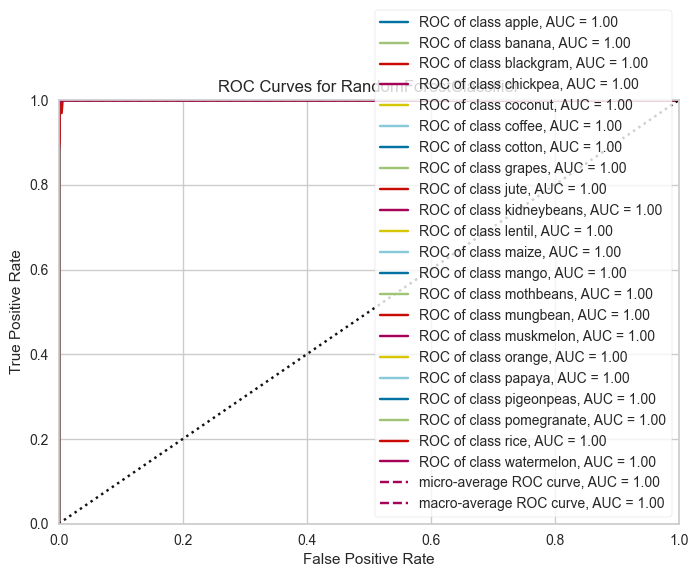

In [41]:
plot_model(bestModel)

In [49]:
evaluate_model(blender)

#CHECK OUT THE FEATURE IMPORTANCE PLOT -- THIS IS CALCULATED USING INTRINSIC METRICS FOR RANDOM FOREST
#IN THE NEXT BLOCK, YOU WILL GET SHAPLEY VALUES, WHICH ARE EXTRINSIC METRICS

#CLICK ON DIFFERENT TABS AND SEE WHAT THEY REPRESENT

#IF ANY OF THE TABS TAKE TOOOO LONG -- CLICK ON STOP BUTTON ABOVE

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

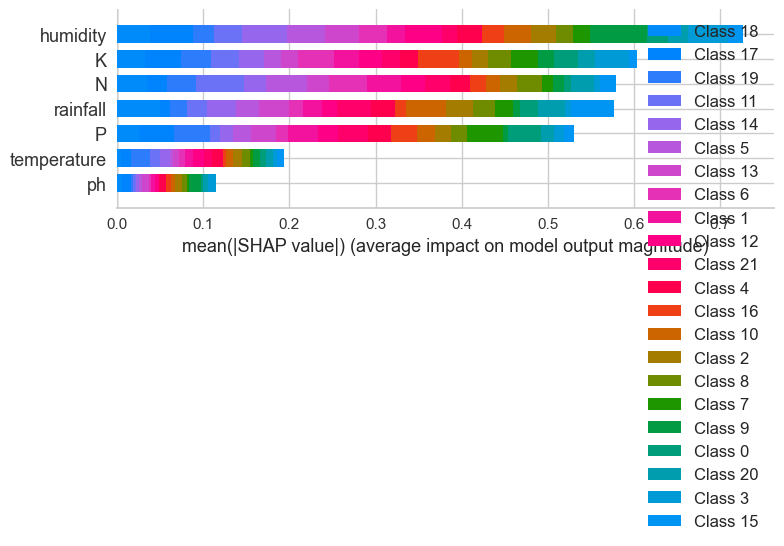

In [43]:
interpret_model(bestModel)

__QUESTION__: Is there a difference in the feature importances based on Intrinsic and Extrinsic metrics? Think about why?

**Response**: Don't know, currently can't look at the intrinsic metrics. Don't really know what they are

Its important to check if the model behaves well on the hold-out (validation) data

In [44]:
predict_model(bestModel)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9955,1.0000,0.9958,0.9957,0.9955,0.9952,0.9953


,N,P,K,temperature,humidity,ph,rainfall,label,Label,Score
0,16.0,10.0,41.0,24.774645,85.636086,6.738994,105.759583,pomegranate,pomegranate,0.98
1,2.0,30.0,30.0,26.001751,94.799988,6.331052,209.540100,coconut,coconut,0.99
2,60.0,55.0,40.0,24.994995,88.956924,7.027780,151.493561,jute,jute,0.91
3,100.0,76.0,45.0,25.567030,75.940674,5.590236,102.786774,banana,banana,0.98
4,85.0,58.0,41.0,21.770462,80.319641,7.038096,226.655533,rice,rice,0.99
...,...,...,...,...,...,...,...,...,...,...
656,12.0,61.0,19.0,19.331627,24.139950,5.655727,68.512535,kidneybeans,kidneybeans,0.98
657,3.0,134.0,199.0,20.283701,81.322357,5.817177,71.066109,grapes,grapes,1.00
658,16.0,35.0,31.0,32.276520,50.193687,5.316876,95.994873,mango,mango,1.00
659,23.0,7.0,34.0,26.105513,91.524216,5.852038,134.127960,coconut,coconut,0.97


Overall, how do you think the model is doing?  
**Response:** Pretty good, it's mostly accurate and highly precise

## Looking back at the data to see why its doing so well

In [24]:
file1.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [25]:
labels = set(file1['label'])
print (labels)
print ("# of crops: ", len(labels))

{'watermelon', 'chickpea', 'lentil', 'coconut', 'blackgram', 'mothbeans', 'mungbean', 'pigeonpeas', 'mango', 'papaya', 'coffee', 'pomegranate', 'banana', 'orange', 'rice', 'kidneybeans', 'muskmelon', 'maize', 'jute', 'grapes', 'apple', 'cotton'}
# of crops:  22


<AxesSubplot:xlabel='label', ylabel='humidity'>

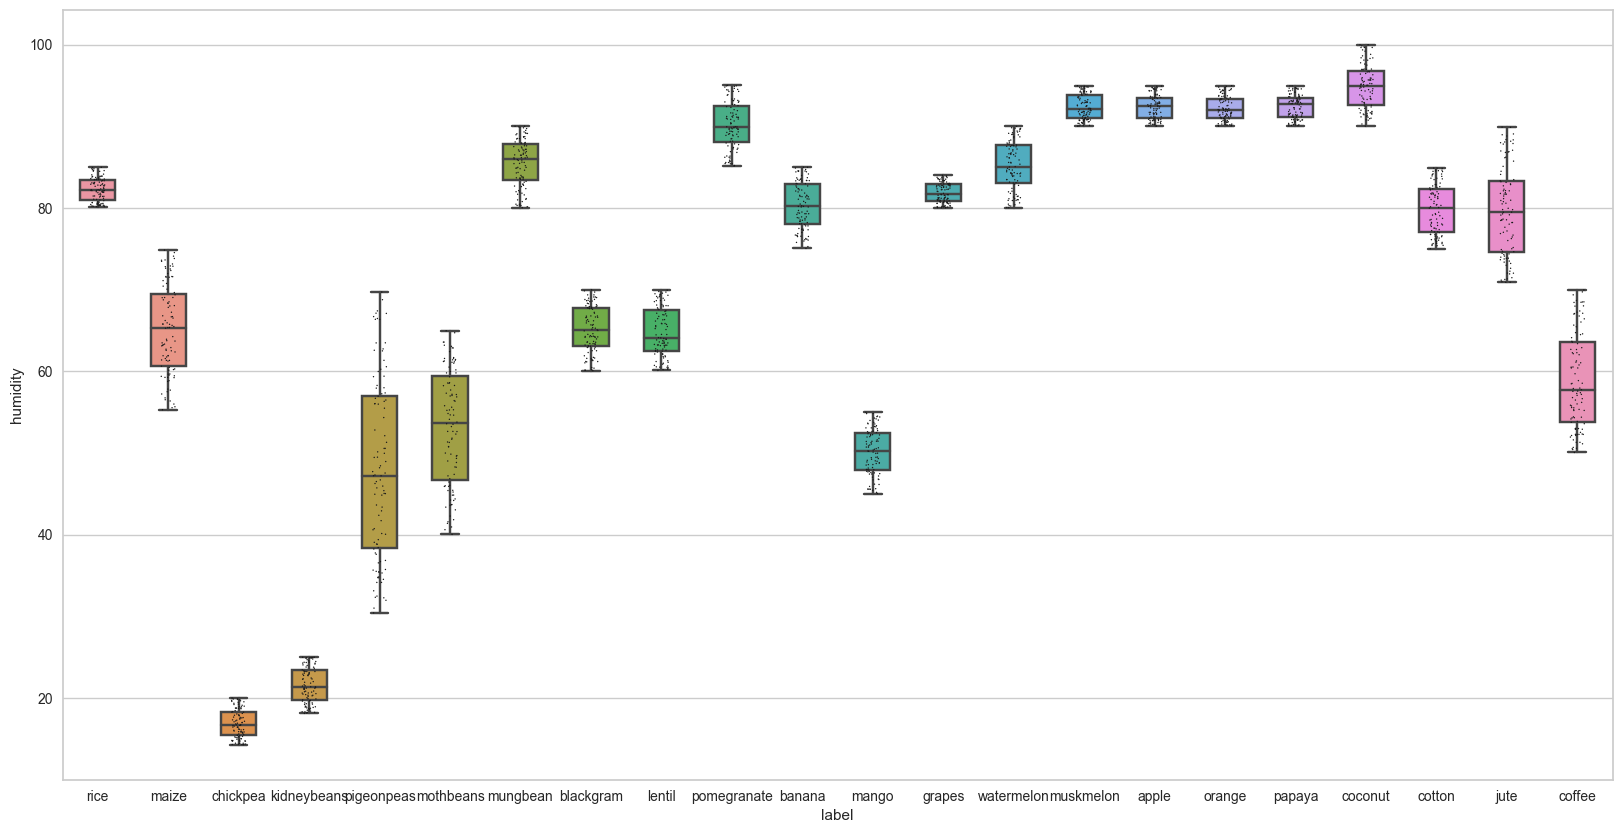

In [26]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(20, 10))
#sns.boxplot(x=file1['label'], y=file1['humidity'])
sns.boxplot(x='label', y='humidity', data=file1,width=0.5)
sns.stripplot(x='label', y='humidity', data=file1, size=1, color=".1", linewidth=0)

<AxesSubplot:xlabel='label', ylabel='ph'>

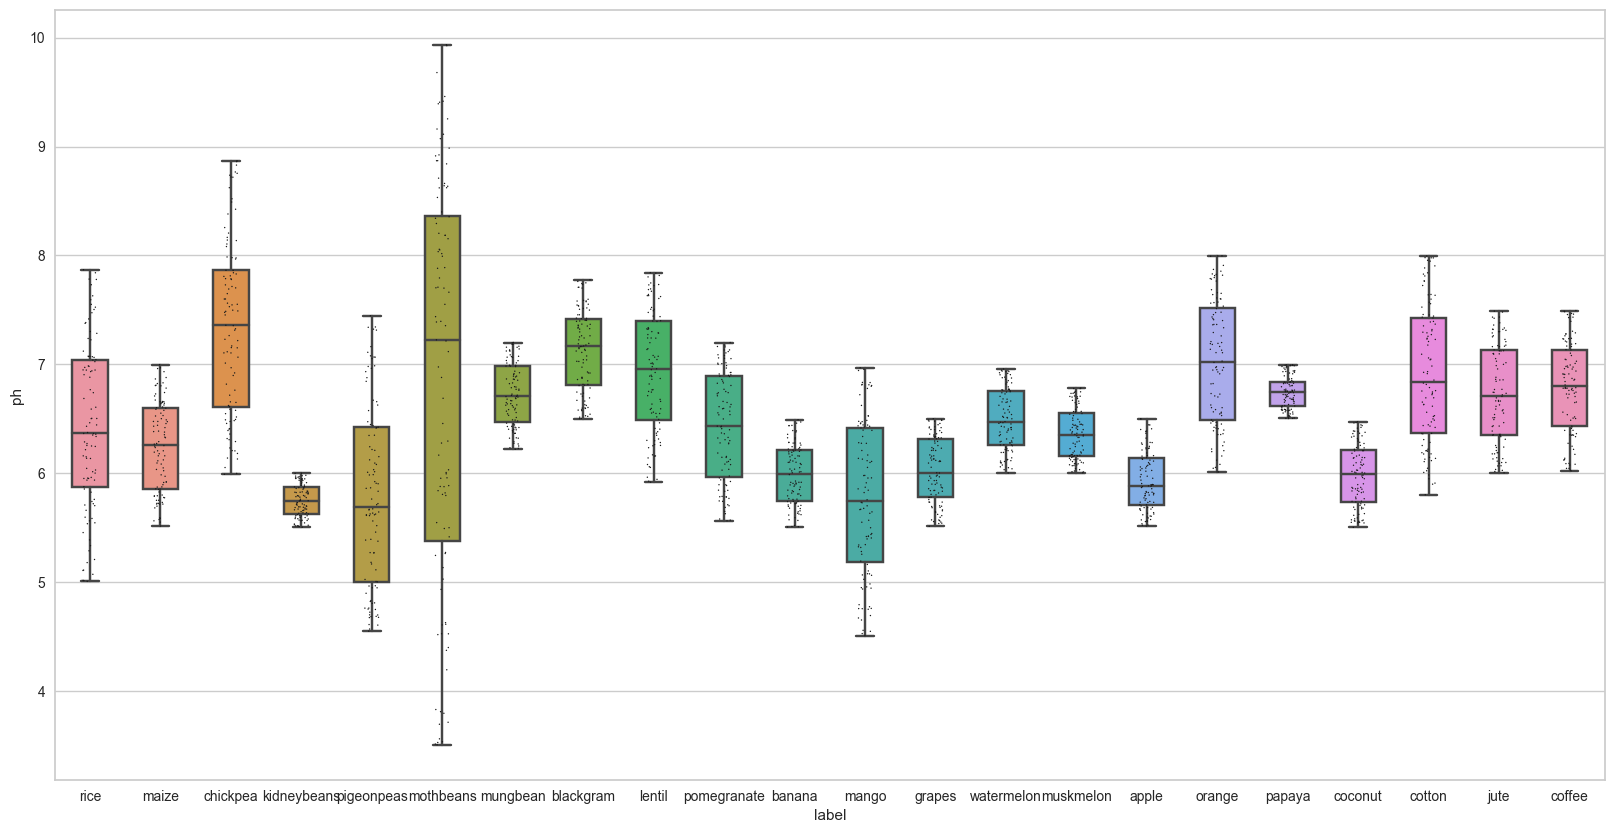

In [27]:
f, ax = plt.subplots(figsize=(20, 10))
#sns.boxplot(x=file1['label'], y=file1['humidity'])
sns.boxplot(x='label', y='ph', data=file1,width=0.5)
sns.stripplot(x='label', y='ph', data=file1, size=1, color=".1", linewidth=0)

Lets plot all variables one by one

In [28]:
cnames = list(file1.columns)[:-1]
cnames

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

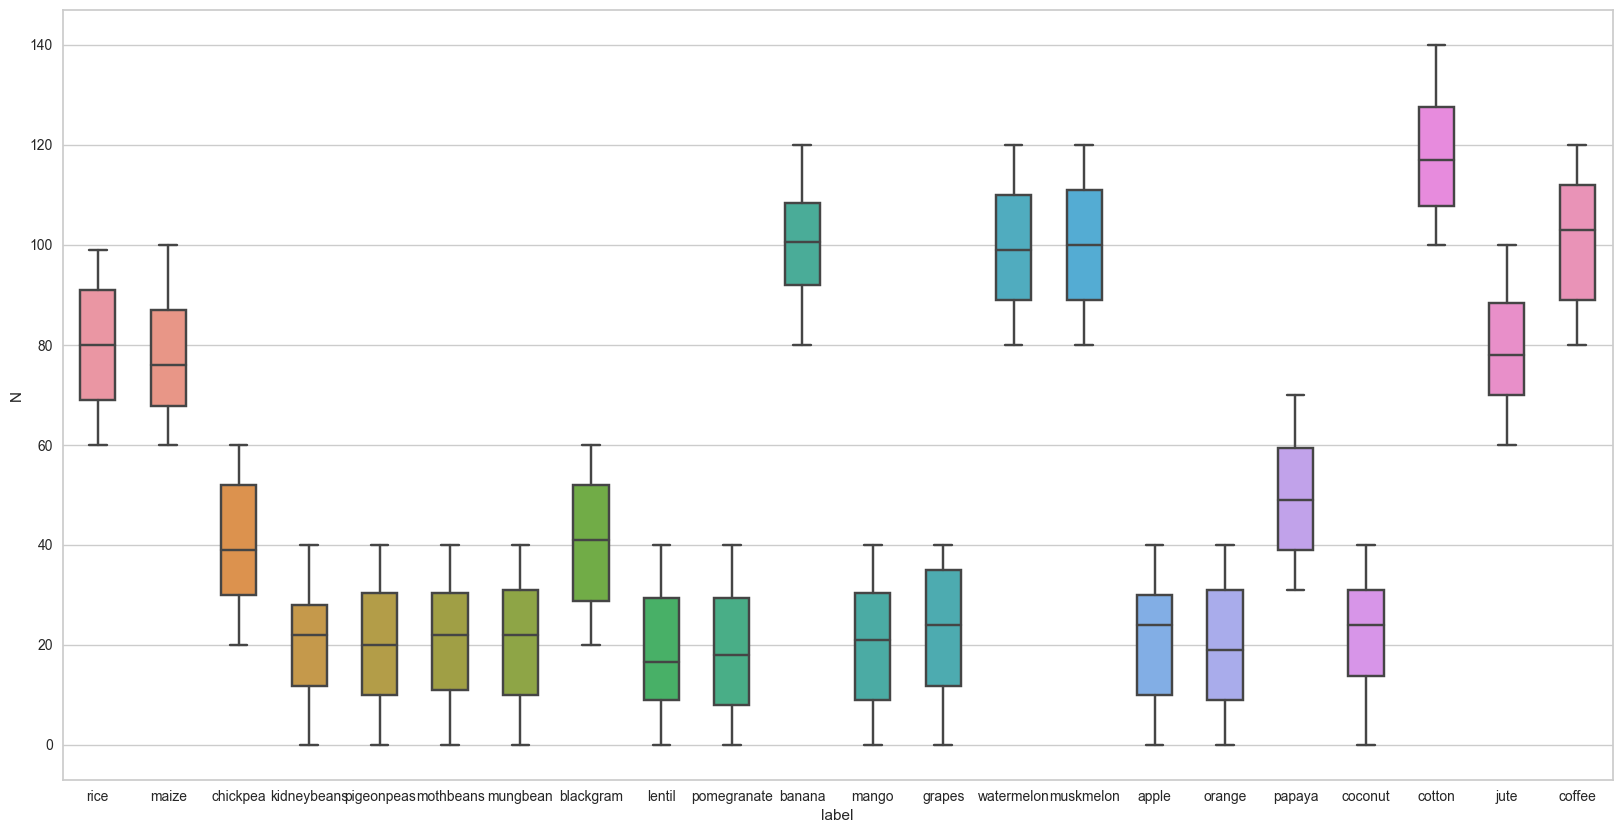

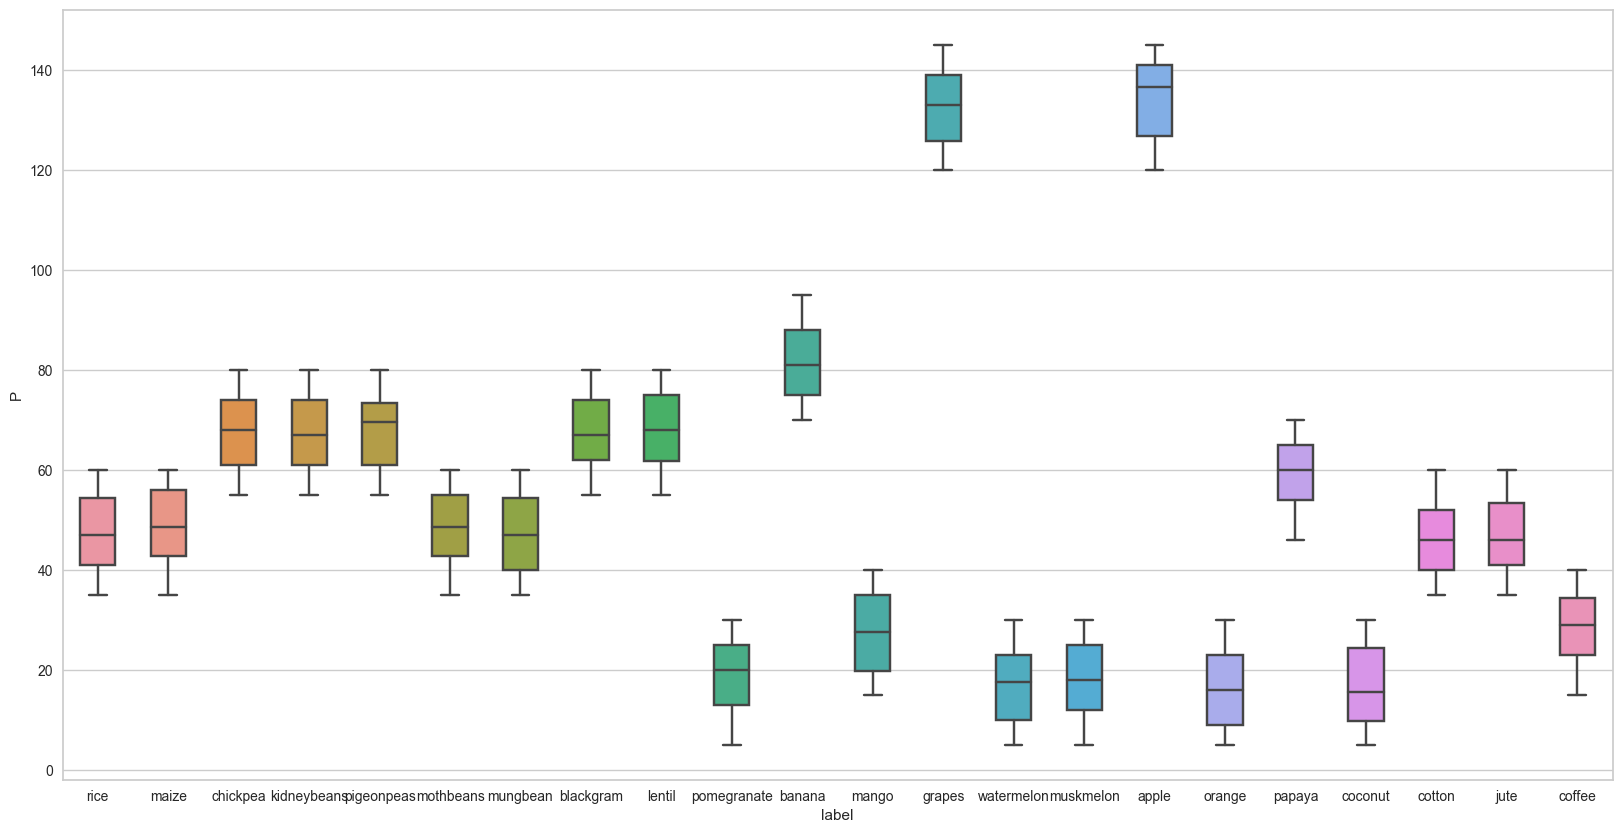

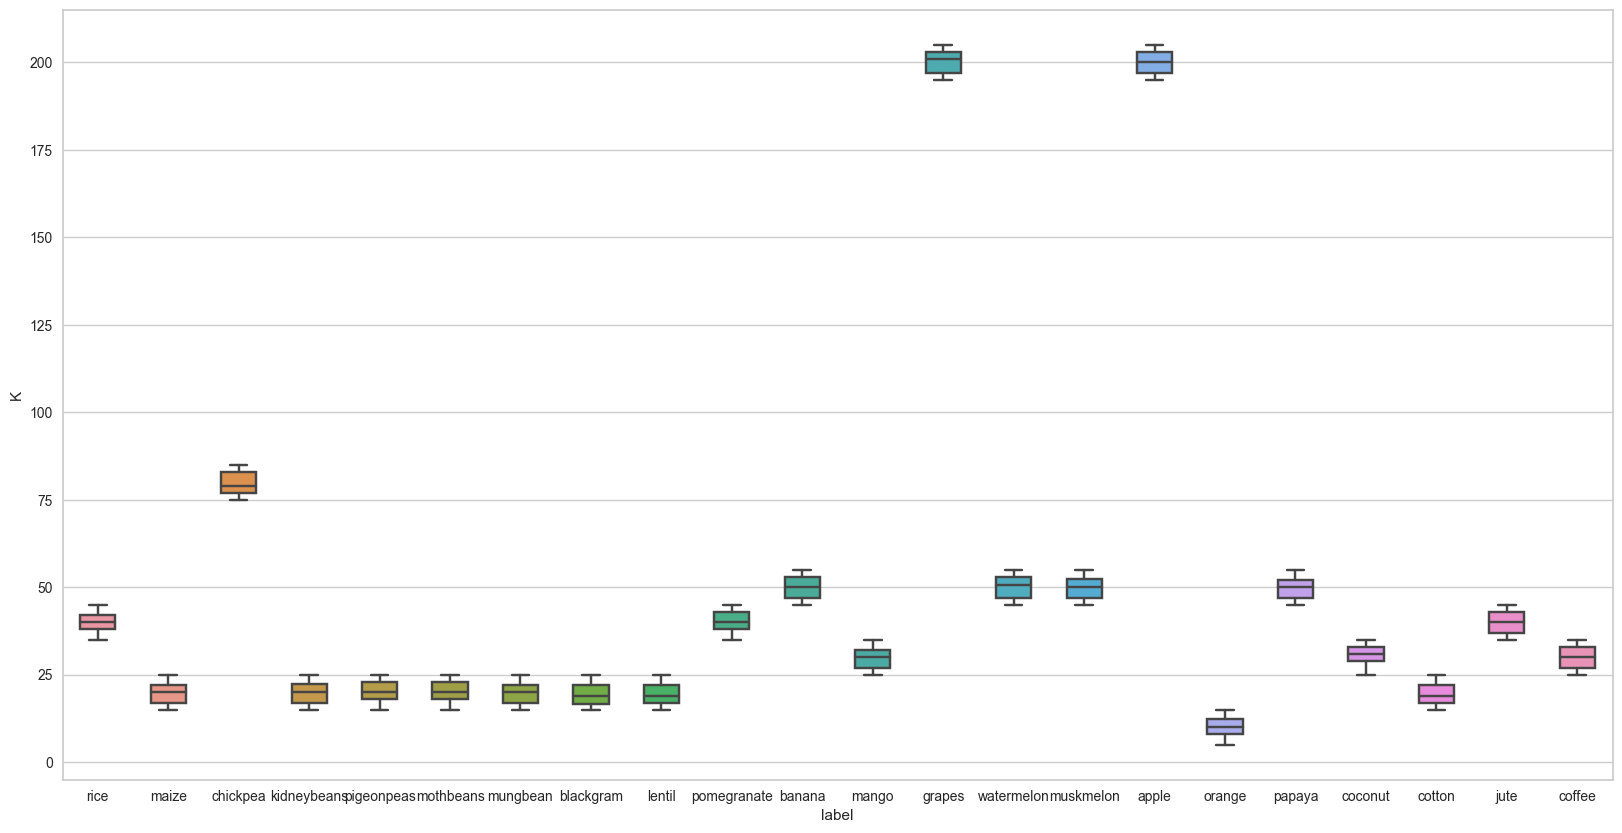

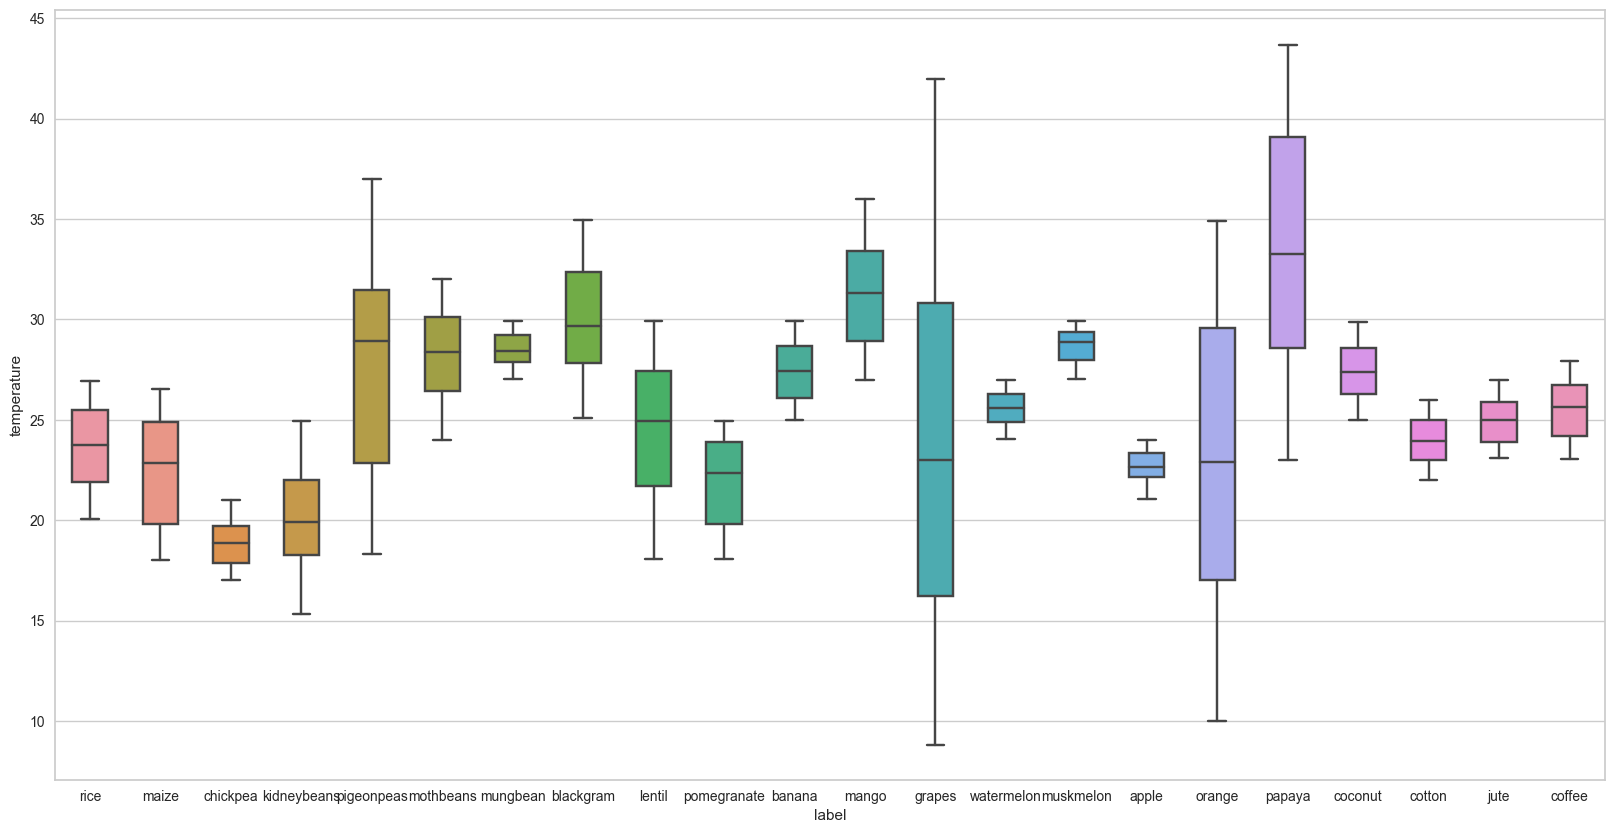

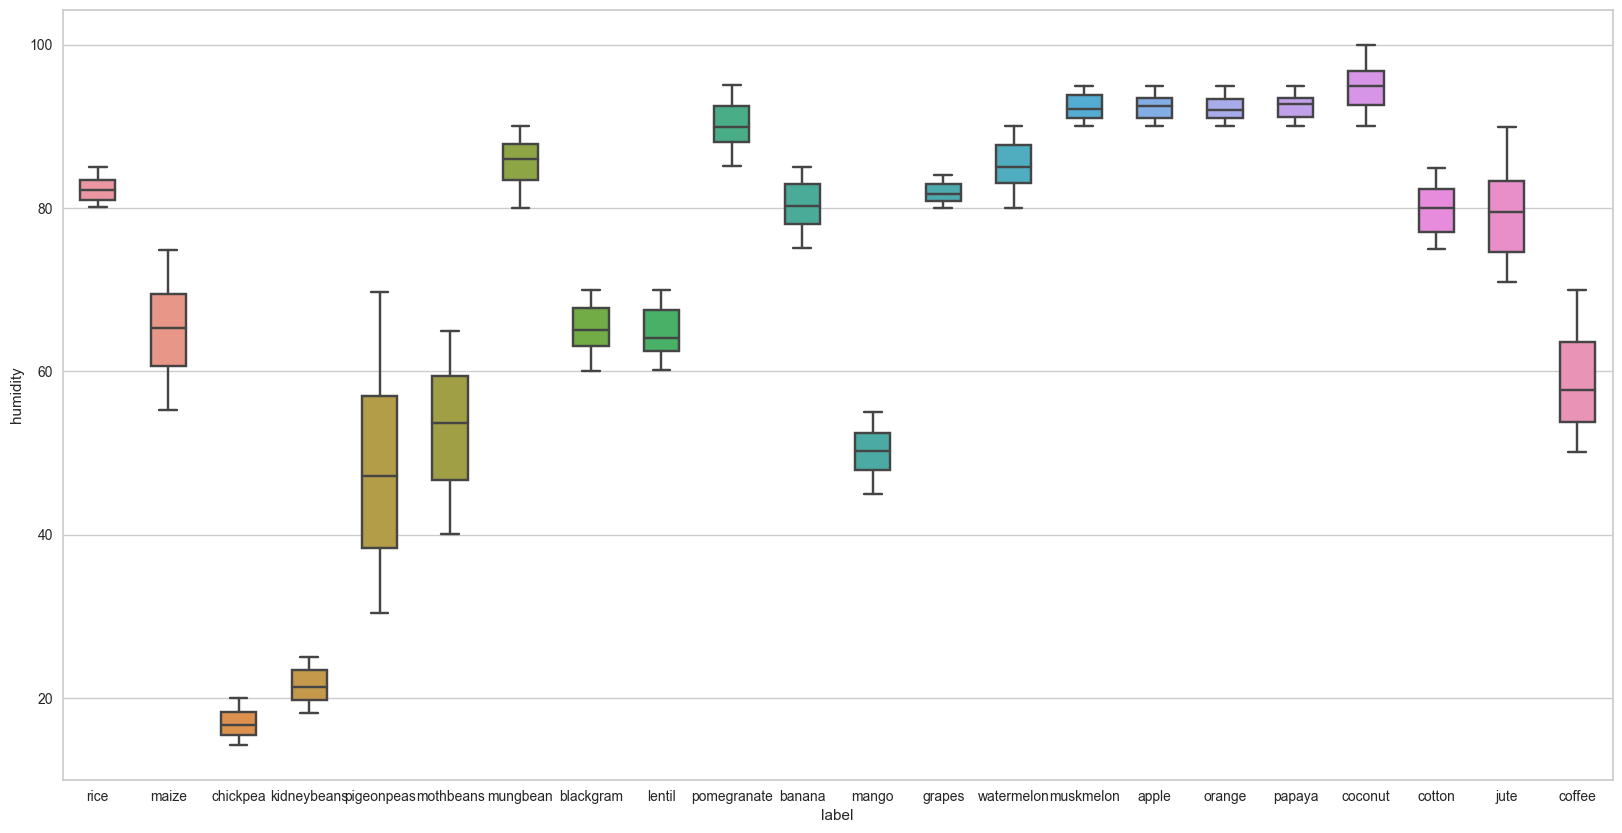

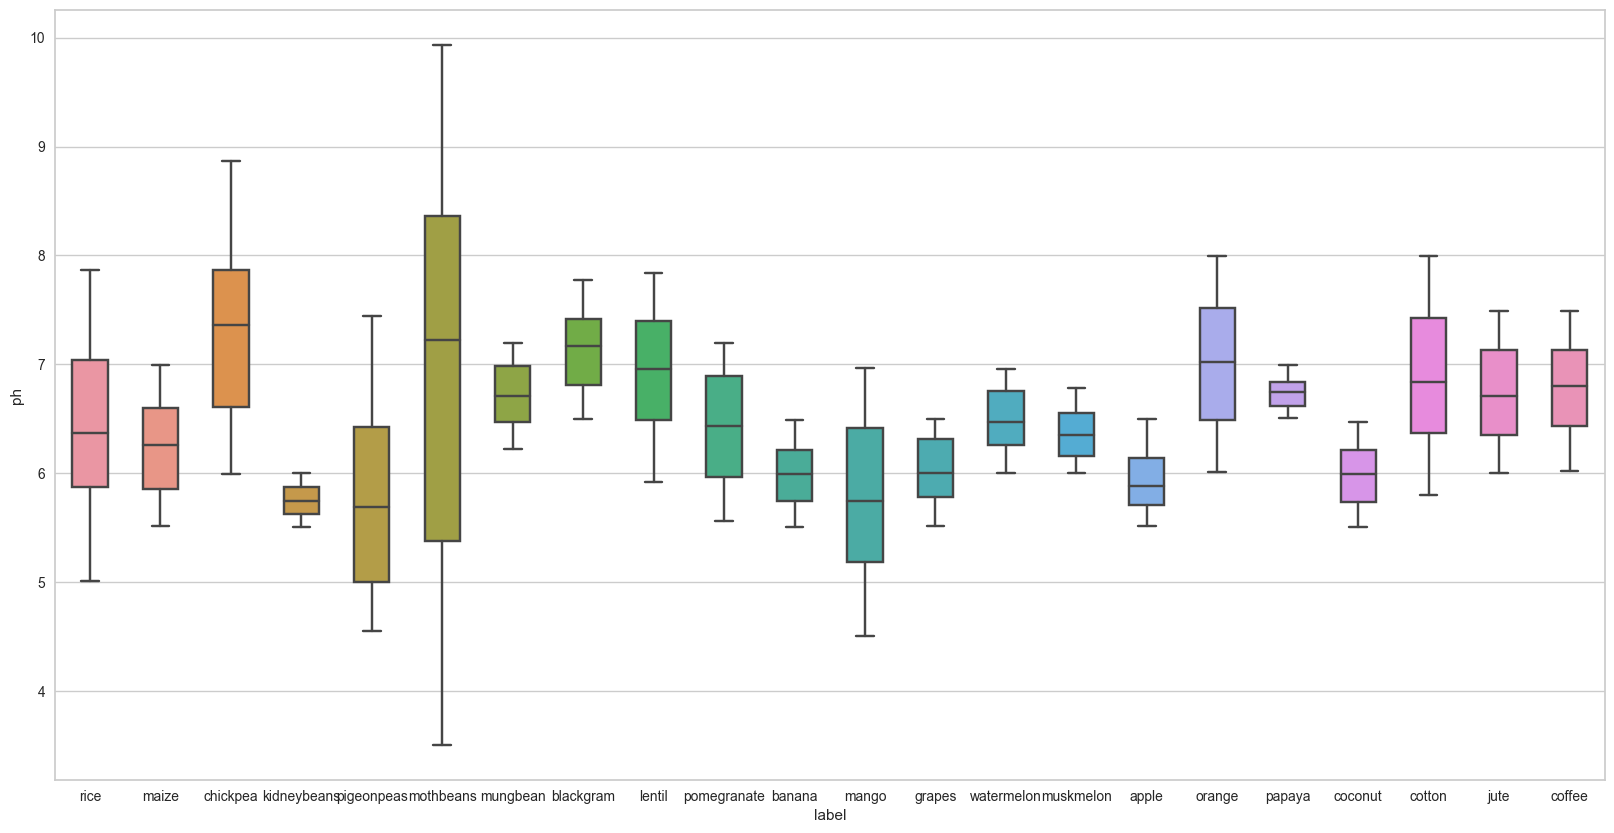

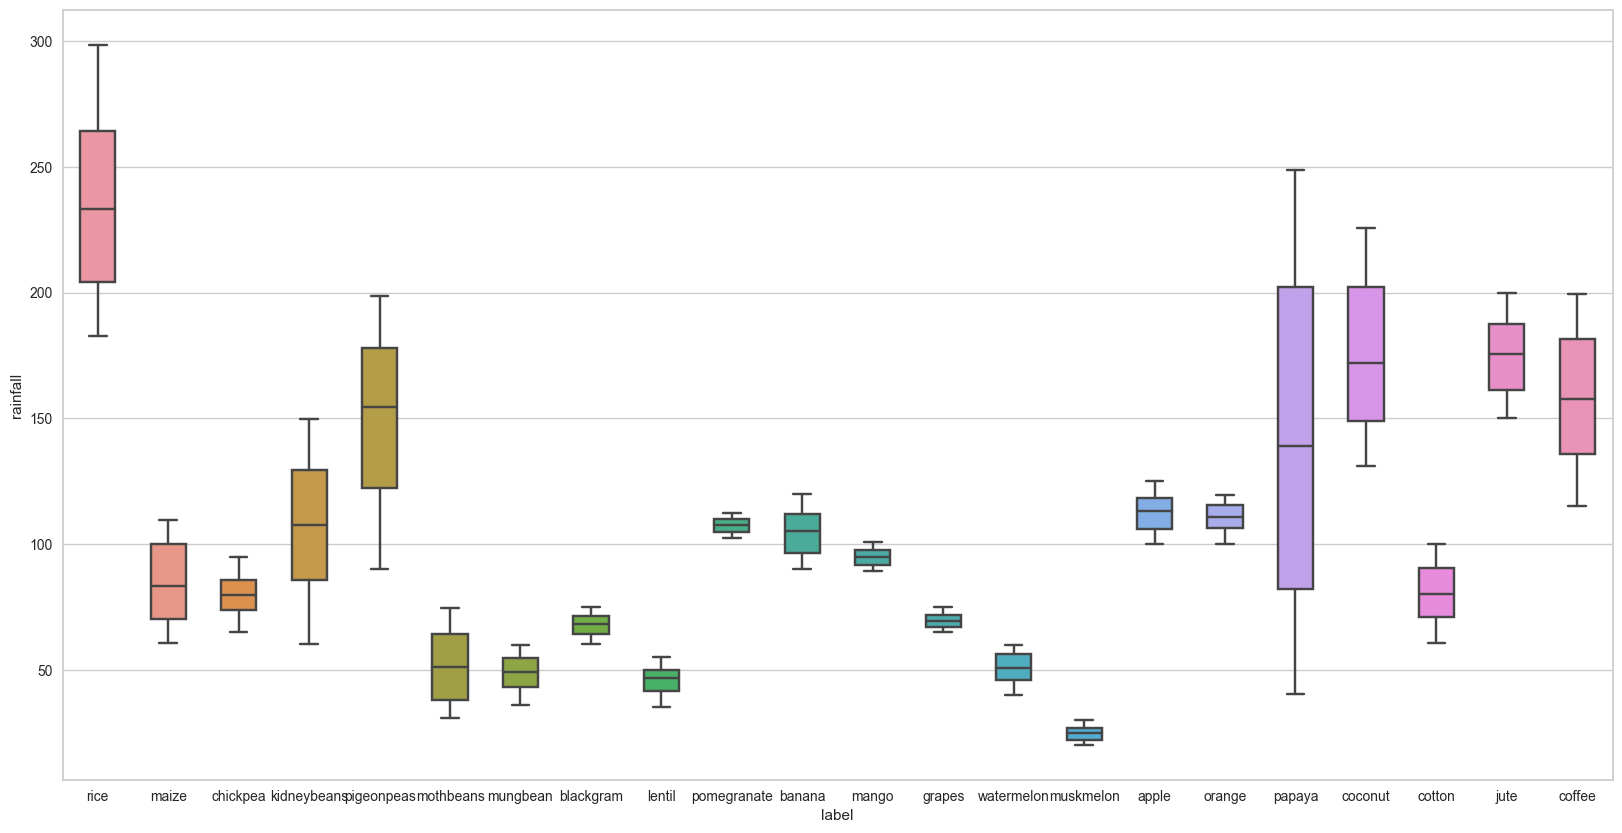

In [29]:
for name in cnames:
    f, ax = plt.subplots(figsize=(20, 10))    
    ax.set(xlabel='Crops', ylabel=f'{name}')
    sns.boxplot(x='label', y=name, data=file1,width=0.5)
    plt.savefig('{}.png'.format(name))    

However, I would like to sort this by high to low for better visualization

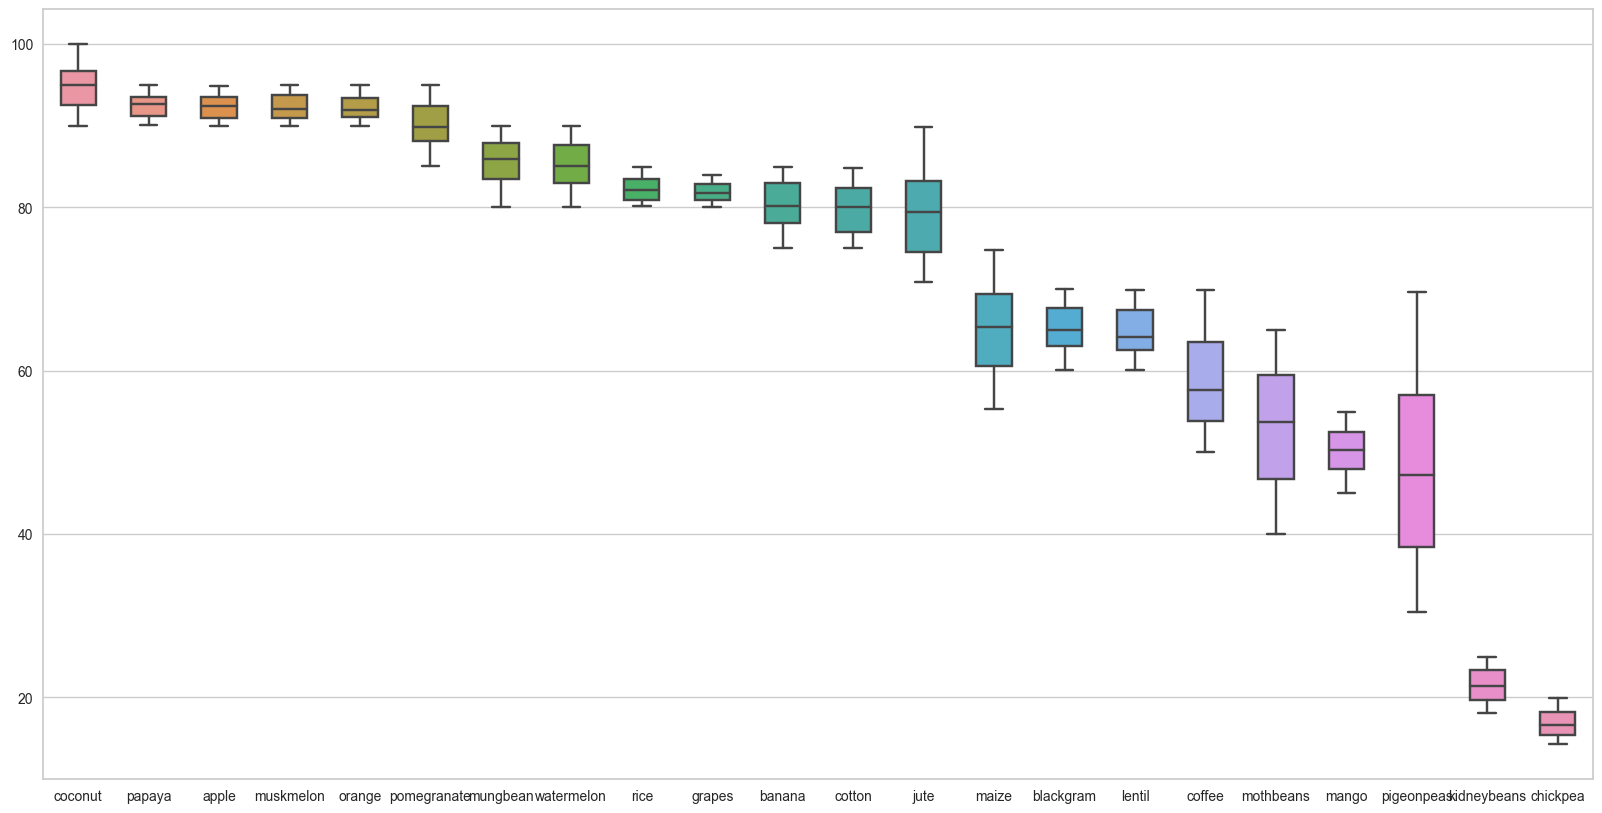

In [48]:

def boxplot_sorted(df, by, column):
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df2.median().sort_values(ascending = False)
    #print (meds.head())
    sns.boxplot(data=df2[meds.index],width=0.5)
    #sns.stripplot(x='label', y='humidity', data=file1, size=1, color=".1", linewidth=0)
    #df2[meds.index].boxplot(rot=90)

f, ax = plt.subplots(figsize=(20, 10))
boxplot_sorted(file1, by='label', column='humidity')

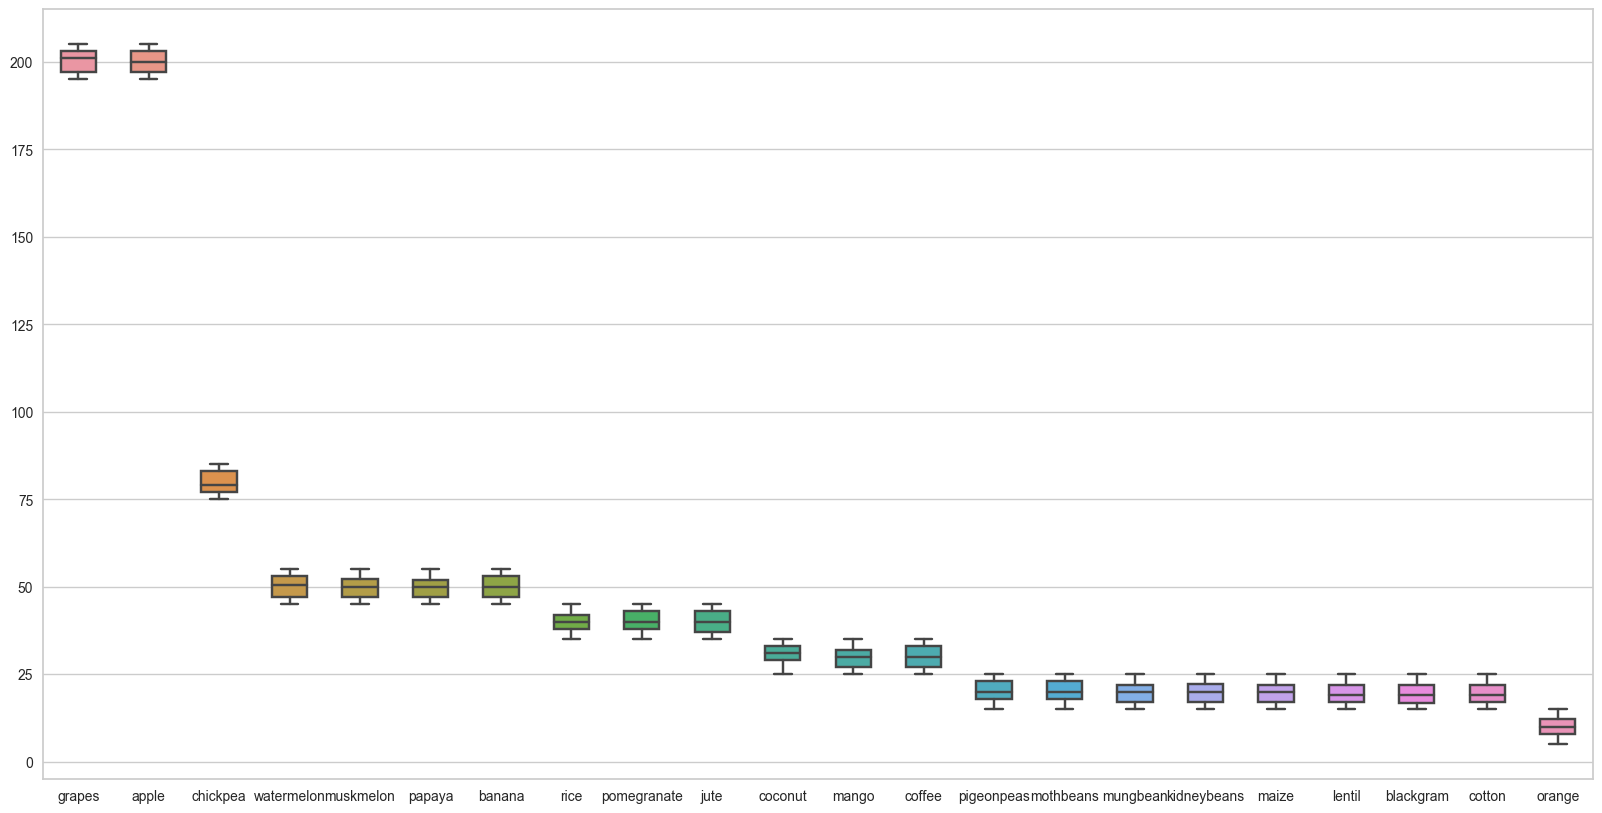

In [59]:
f, ax = plt.subplots(figsize=(20, 10))
boxplot_sorted(file1, by='label', column='K')
#Change the column to different values and look at the effect


Does it make sense based on the Shapley values? Or is it difficult to tell?

**Response:** This makes sense: there is more variation on those with higher Shapley values. 

Stare at these results for some time before you move ahead and see if anything above makes sense. 

Which factors are differentiating between the different crops? 

**Response:** Humidity has the largest effect. Then K, N, rainfall, P has pretty strong effects. 

## Unsupervised ML: Principal component analysis

In [50]:
file1 = pd.read_csv("Crop_recommendation.csv", header= 0, sep=",")
file1.shape

(2200, 8)

In [51]:
file1.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [52]:
x = file1[file1.columns.difference(['label'])]
y = file1['label']
x

,K,N,P,humidity,ph,rainfall,temperature
0,43,90,42,82.002744,6.502985,202.935536,20.879744
1,41,85,58,80.319644,7.038096,226.655537,21.770462
2,44,60,55,82.320763,7.840207,263.964248,23.004459
3,40,74,35,80.158363,6.980401,242.864034,26.491096
4,42,78,42,81.604873,7.628473,262.717340,20.130175
...,...,...,...,...,...,...,...
2195,32,107,34,66.413269,6.780064,177.774507,26.774637
2196,27,99,15,56.636362,6.086922,127.924610,27.417112
2197,30,118,33,67.225123,6.362608,173.322839,24.131797
2198,34,117,32,52.127394,6.758793,127.175293,26.272418


In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pc = pca.fit_transform(x)

In [54]:
pc_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2','PC3','PC4', 'PC5'])
pc_df['label'] = y
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,label
0,-59.969729,84.055388,32.450240,1.031939,1.781662,rice
1,-64.090628,107.779037,24.381552,11.177477,-8.363917,rice
2,-75.156888,142.468675,-0.556024,1.930587,-6.069917,rice
3,-80.247626,117.340628,13.940485,-3.881560,6.469536,rice
4,-85.084925,137.343003,16.712434,0.478325,2.652049,rice


PC1:0.4012913978361851
PC2:0.34270576169983985
PC3:0.15762164998031306
PC4:0.06616341382279306
PC5:0.029463068515206563


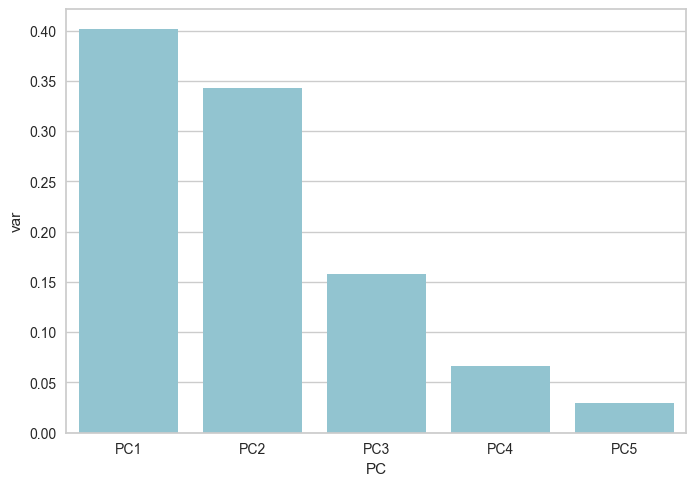

In [55]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

for i in range(0,len(pca.explained_variance_ratio_)):
    value = pca.explained_variance_ratio_[i]
    print ("PC{}:{}".format(i+1,value))

You can see above that the first two PCs are explaning 0.40 + 0.34 = 0.74 i.e. 74% of the variation between the crops. That is good.

In [56]:
pc_df

,PC1,PC2,PC3,PC4,PC5,label
0,-59.969729,84.055388,32.450240,1.031939,1.781662,rice
1,-64.090628,107.779037,24.381552,11.177477,-8.363917,rice
2,-75.156888,142.468675,-0.556024,1.930587,-6.069917,rice
3,-80.247626,117.340628,13.940485,-3.881560,6.469536,rice
4,-85.084925,137.343003,16.712434,0.478325,2.652049,rice
...,...,...,...,...,...,...
2195,-64.055404,54.019513,44.868290,14.166060,11.456816,coffee
2196,-52.816986,3.172884,38.516656,8.100532,26.963049,coffee
2197,-65.984590,48.821451,55.387287,16.311582,11.061706,coffee
2198,-42.988902,7.978078,55.117203,24.208316,21.603004,coffee


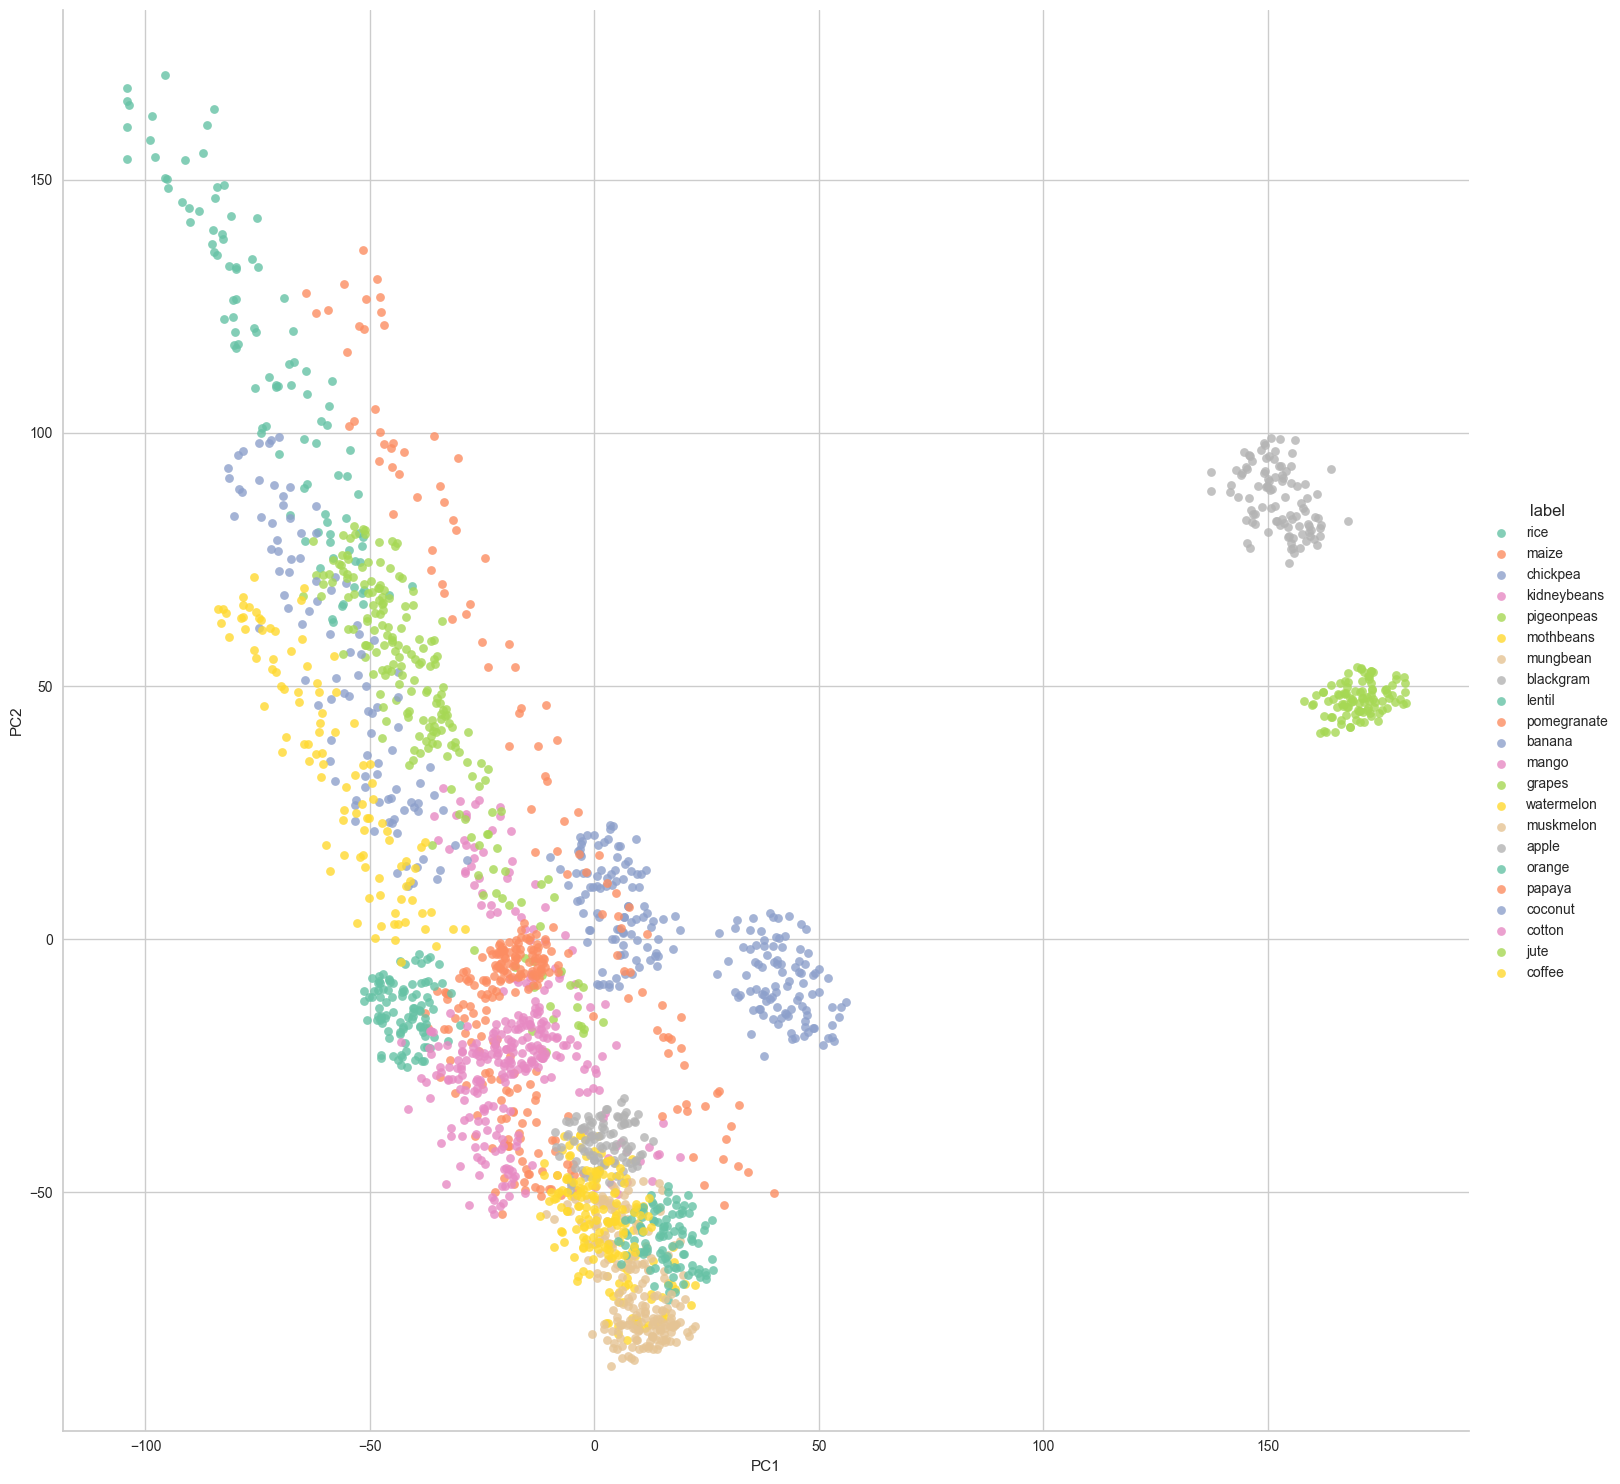

In [57]:
ax = sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='label', # color by cluster
  legend=True,
  palette="Set2",           
  scatter_kws={"s": 40},
  height=15) # specify the point size

* What does the above plot say?

It shows the spread in variation of the different crops based PC1 and PC2.

* What are the two crops on the right? Why are they so different? You may want to look at the boxplots above to answer this question.

The two crops are apples and grapes on the right, they are so different because they must have a much larger value for whatever PC1 is compared to the other crops. This is also seen in the values for apples and grapes in their K values, so perhaps K values is strongly weighted in PC1.


Let's plot a 3D plot so that we can see these points a little better

In [60]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

In [61]:
pc_df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [62]:
print (range(10))

range(0, 10)


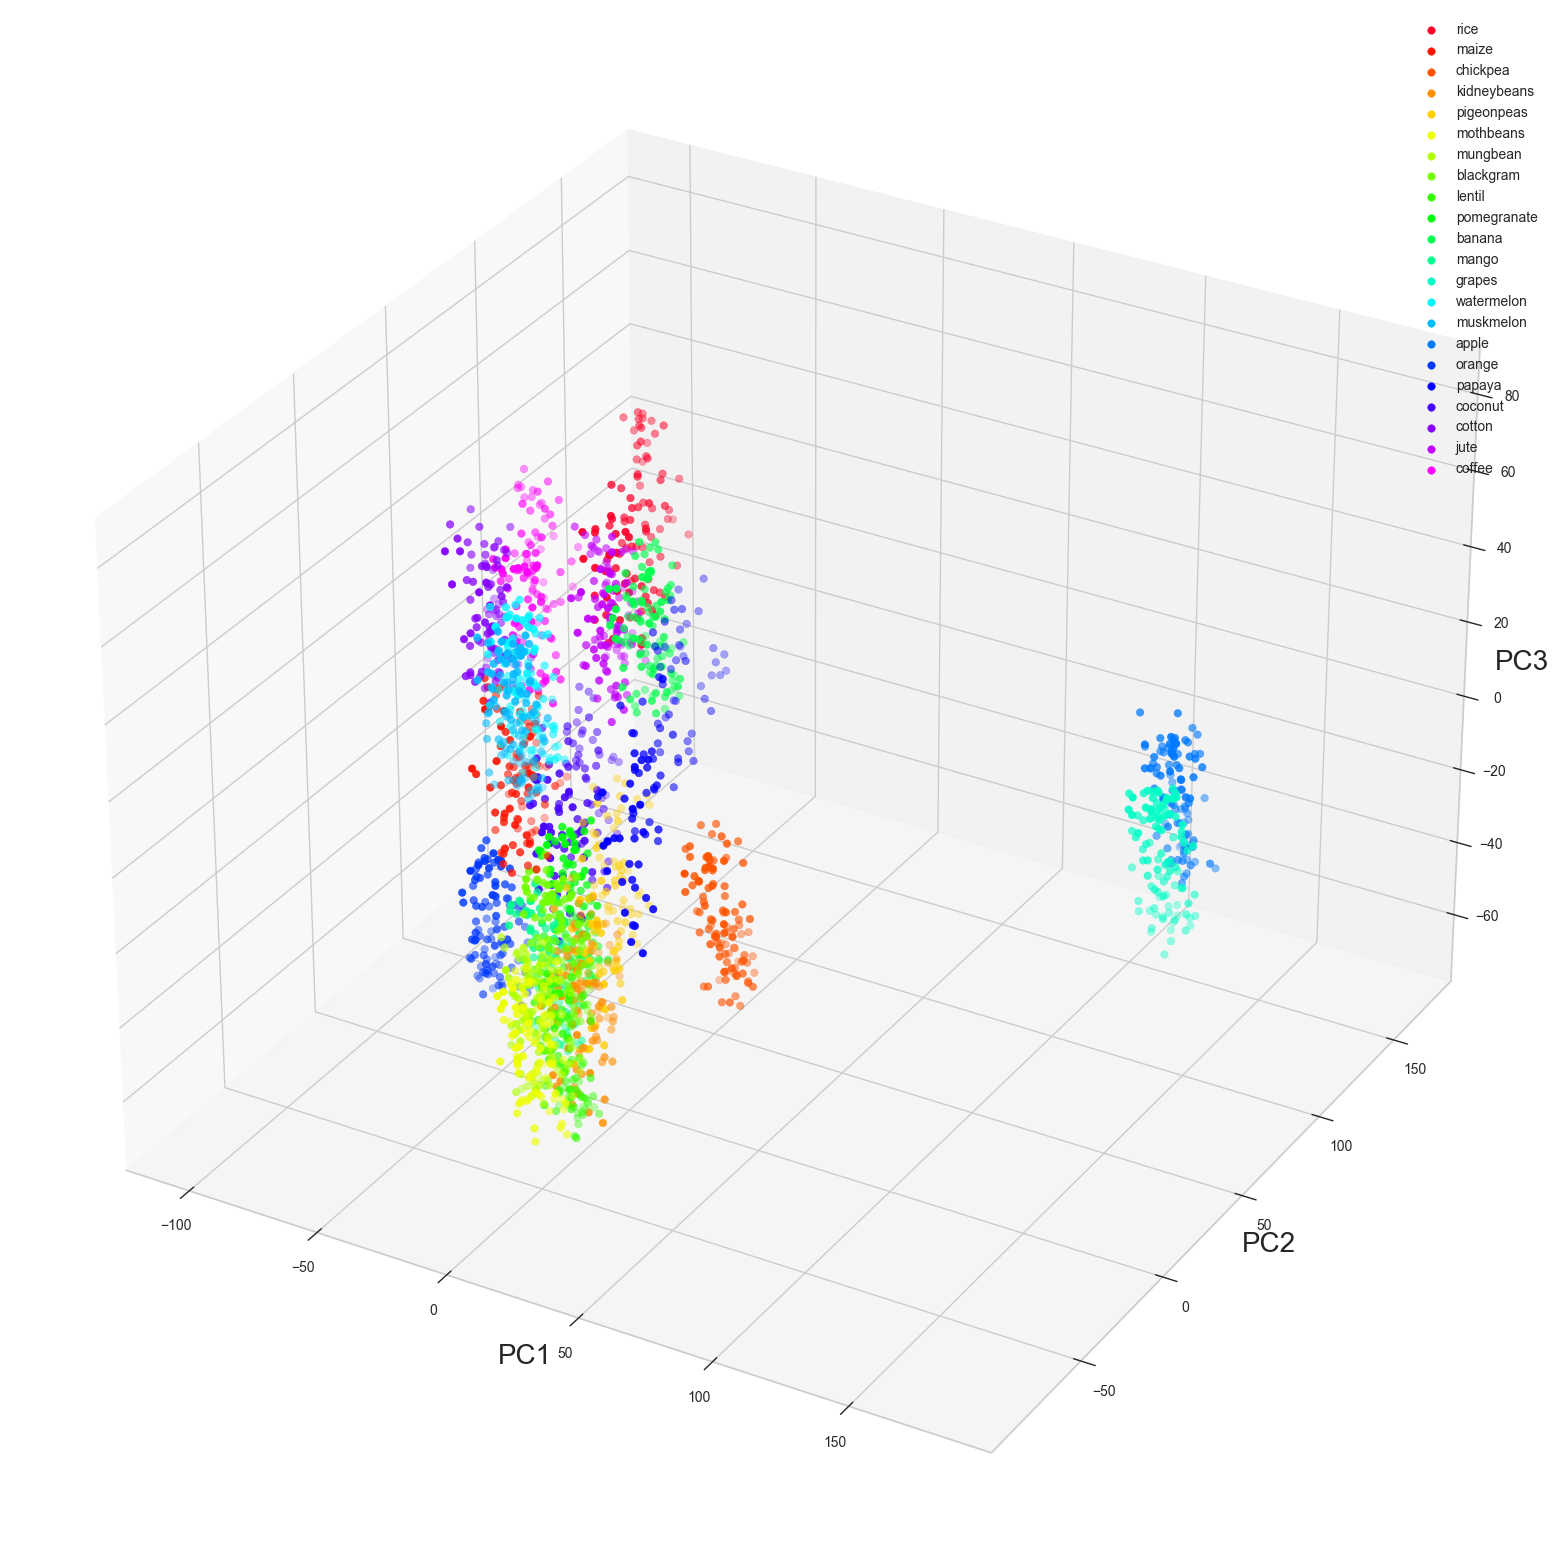

In [63]:
NUM_COLORS=len(set(file1['label']))
cm = plt.get_cmap('gist_rainbow')
fig = plt.figure(figsize=(20,20))
ax=fig.add_subplot(111, projection = '3d')
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_zlabel('PC3', fontsize=20)
ax.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for lab in pc_df.label.unique():    
    ax.scatter(pc_df.PC1[pc_df.label==lab],pc_df.PC2[pc_df.label==lab],pc_df.PC3[pc_df.label==lab],label=lab,
               s=30)
ax.legend()

### Figuring out which features are helping PC1 and PC2 explain the overall variation

In [64]:
#Let's first extract out the PCA components from the pca object

imp = abs( pca.components_ )
print (imp)
print ("Shape of the components: ", imp.shape) 

[[7.58764968e-01 1.80735334e-01 4.40880097e-01 1.53158716e-02
  1.46690093e-03 4.43709263e-01 1.09802132e-02]
 [3.93266840e-01 2.82311880e-02 2.07408888e-01 6.77157744e-02
  2.58222604e-03 8.92664376e-01 9.16315695e-03]
 [2.14289728e-01 9.46431143e-01 5.71901433e-02 2.24545325e-01
  1.24259832e-03 6.81943466e-02 2.16221770e-03]
 [2.27218295e-01 2.65676499e-01 5.60180854e-01 7.49365296e-01
  3.89223307e-04 3.48346648e-02 3.49757509e-02]
 [4.13334754e-01 1.35176020e-02 6.67049900e-01 6.14766109e-01
  1.40102109e-03 1.91743213e-02 7.55585928e-02]]
Shape of the components:  (5, 7)


The shape (5 rows, 7 columns) tells us that the rows are the PCs and the columns are the features (since we have 7 different features)

<AxesSubplot:>

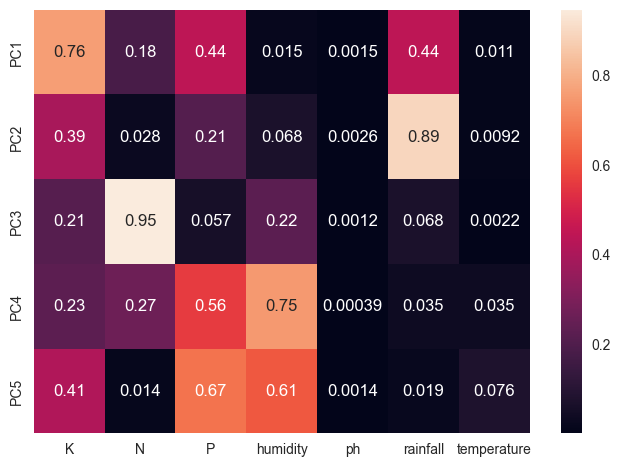

In [65]:
sns.heatmap(imp, xticklabels = x.columns, yticklabels = ["PC1", "PC2", "PC3", "PC4", "PC5"], annot=True)

* Which feature is important discriminant for PC1?
    - K

* Which feature is important discriminant for PC2?
    - rainfall

Take some time to look at the feature importances shown here and go back and compare with the boxplots of the features you exported as png (or shown above). 

* What did you learn from this exercise?
    - That apples and grapes both need a lot of potassium. Also how to make models using pycaret, and a little more about how PCA works for unsupervised data. 

* If you wanted to plant some crop, would you be able to tell where to plant it?
    - I would at least have a better idea of what type of nutrients it likes. 

* What additional information would you need for making such decisions?
    - I would need to know what crop I want to plot, and then predict using the model the common values for these features. 

* What is one caveat of the data we used for this?
    - We don't know what species of each crop was used. 

# HOMEWORK

* Run the Mushroom Jupyter notebook

* Answer the questions in the notebook

* Submit answers in docx format before next Tuesday midnight